# Trees, Forests and the Classification Problem: <br> Simulations & an Application to Redistribution Preferences 

Andreas Koundouros | University of Bonn | Computational Statistics Project | Summer Term 2022

Handed in: August 23, 2022

---

## Table of Contents
* [Preliminaries](#seventh-bullet)
* [1 Introduction](#first-bullet)
* [2 Overview of the Statistical Methods](#second-bullet)
    * [2.1 Classification Trees](#second-one-bullet)
    * [2.2 Random Forests](#second-two-bullet)
* [3 Simulation Studies](#third-bullet)
    * [3.1 The Impact of the Features' Correlation Structure](#third-one-bullet)
    * [3.2 The Issue of (Highly) Categorical Targets](#third-two-bullet)
    * [3.3 The Problem of Omitted Features](#third-three-bullet)
* [4 Economic Application](#fourth-bullet)
    * [4.1 Results from Classification Trees and Random Forests](#fourth-one-bullet)
    * [4.2 Discussion](#fourth-two-bullet)
* [5 Conclusion](#fifth-bullet)
* [References](#sixth-bullet)
* [Appendix](#eighth-bullet)

---

### Preliminaries <a class="anchor" id="seventh-bullet"></a>

This thesis is best viewed in Jupyter Notebook. All required material, e.g. the notebook, the `R` codes and the data set, can be found in my [GitHub](https://github.com/andkound98/Summer22CompStatProject) repository. To run the `R` code included in this notebook, install (if necessary) and load the following `R` packages and load the functions required for this notebook.

In [2]:
# Install (if necessary) and load the following required packages
suppressMessages(library(MASS))             # For multivariate data simulation
suppressMessages(library(dplyr))            # For data wrangling
suppressMessages(library(rpart))            # For tree estimation
suppressMessages(library(rpart.plot))       # For tree plotting
suppressMessages(library(randomForest))     # For random forests 
suppressMessages(library(foreign))          # For importing STATA data files
suppressMessages(library(latex2exp))        # For TeX in plots
suppressMessages(library(tictoc))           # For measuring running times
rm(list=ls())                               # Clean the current environment 
seed <- 123                                 # Seed used throughout for reproducibility 
source("/Users/andreaskoundouros/Documents/Uni Master SS22/Computational Statistics/Project Redistribution Preferences/Code/R_Functions.R")
# Source function file; NOTE: you have to add your working directory in the source command

---

## 1 Introduction <a class="anchor" id="first-bullet"></a>

By now, machine learning methods and their application have found their way into empirical economic analysis. Approaches such as K-nearest neighbours, decision trees and neural networks are increasingly used in applied economics. For an insightful overview of some of these methods from the perspective of an economist, see *Varian (2014)*. 

The present project is motivated by the success of these methods and discusses two of them in the context of the classification problem. One machine learning solution to this problem are classification trees, which provide an interpretable, but often statistically unstable approach. Random forests aim at improving the single tree classifier by agggregating informtation from multiple trees but weaken interpretability. Shedding some light onto the statistical strengths and weaknesses of trees and forests is the goal of this project's simulation studies. These studies show that:
* multicollinearity is not a significant problem for trees and forests,
* the performance of these methods is decreasing in the number of categories of a given outcome, and
* the problem of omitting relevant features is - as expected - a sizeable issue. 

After presenting and discussing these simulations, an economic application is presented, which replicates the approach by *Keely & Tan (2008)*, abbreviated by *KT* hereafter. The authors apply classification trees and random forests to explore the factors behind individual preferences for government redistribution of incomes. The present application shows that, unlike *KT* find, a respondent's ethnicity is not an important determinant of his redistribution preferences. In contrast, age, family income and region of upbringing seem to be relevant. 

The rest of this paper is structured as follows. [Section 2](#second-bullet) succinctly reviews the theory of the methods. [Section 3](#third-bullet) conducts the simulation studies. Subsequently, [section 4](#fourth-bullet) is concerned with the economic application and [section 5](#fifth-bullet) concludes. 

## 2 Overview of the Statistical Methods <a class="anchor" id="second-bullet"></a>

In this section, the classification problem is presented and classification trees and random forests as solutions to this problem are discussed, thereby drawing heavily from the textbooks by *James et al. (2021)* and *Hastie et al. (2009)*.

To describe the classification problem formally, let $y$ be a categorical traget variable, i.e. an outcome with $J \in \mathbb{N}$ distinct categories or classes. Associated to each observation, indexed by $i = 1,..., N$, is a set of $p$ feautures, either discrete or continuous, summarised in the $N \times p$-matrix $X$. Then, the classification problem is the issue of determining to which class $j = 1, ..., J$ observation $i$ belongs, given the realisation of its feautures. The performance of a method at such a classification exercise is then the share of misclassified test data observations from all test observations.

### 2.1 Classification Trees <a class="anchor" id="second-one-bullet"></a>
Classification (and regression) trees are an idea popularised mainly by *Breiman et al. (1984)*. As illsutrated in detail in *James et al. (2021)* and *Hastie et al. (2009)*, the essential procedure of trees rests on recursive binary splitting, the objective of which is to iteratively find binary, rectangle-shaped partitions of the feature space that minimise the heterogeneity of the composition of observations that fall into the resulting partitions, subject to not overfitting the data (see also the technical appendix in *KT*).

In detail, the algorithm finds - in the first step of the process - for which feauture $X_d$ and which split value $s$ in the domain of $X_d$, the heterogeneity of the observations in the two resulting partions is minimised. Following *KT*'s explanations, I use $L = \{ X | X_d < s \}$ and $R = \{ X | X_d \ge s \}$ to indicate the subsets that correspond to the left and right path of the tree, respectively. The above process subsequently continues with further partitioning one of the subsets $L$ or $R$ and stops when a certain criterion, e.g. a minimum number of observations in each partition, is reached. The result are $M$ final partitions of the feature space, called leaves. Naturally, the prediction for observation $i$ follows majority voting, i.e. we assgin the class $j$ to $i$ whenever most (training) observations in $m = 1, ..., M$ belong to $j$. 

There are various measures available for quantifying heterogeneity (often called impurity) in a partition of a classification tree (*Hastie et al., 2009, p. 309*). A commonly used one is the Gini impurity index. Formally, and in slight deviation of the notation in the textbooks, the objective of the algorithm at the first step is: 

$$\text{min} \ (d,s) \ \ \Bigg\{ \frac{N_L}{N_L+N_R} \sum_{j = 1}^J \hat{p}_{Lj} (1 - \hat{p}_{Lj}) + \frac{N_R}{N_L+N_R} \sum_{j = 1}^J \hat{p}_{Rj} (1 - \hat{p}_{Rj}) \Bigg\},$$

where clearly, $L$ and $R$ are functions of $d$ and $s$ (see above). $\hat{p}_{Lj}$, formally given by $\hat{p}_{Lj} = \frac{\sum_{x_i \in L} I(y_i = j)}{N_L}$, is the share of training data falling in $L$ belonging to $j$ (*Hastie et al., 2009, p. 309*). $N_L$ is the number of observations in $L$. Importantly, the above objective is minimised for values of $\hat{p}_{Lj}$ that are either very close to 1, i.e. the node consists almost purely of observations from class $j$, or 0, in which case the node includes almost no observations from $j$. Thus, with the Gini index, homogeneous (pure) leaves are preferred (*James et al., 2021, p. 336*). Note that there are alternatives to the Gini index but the `R` implementation `rpart` makes use of it by default (see page 21 of the corresponding package [documentation](https://cran.r-project.org/web/packages/rpart/rpart.pdf)). Of course, in the next steps of the algorithm, the same logic of splitting continues to hold, despite the partitions' representations becoming more involved. 

Fully-grown trees suffer from overfitting. That is, a tree might perfectly classify the training observations but will, in the process, also fit the noise in the data and thus fail to detect the general patterns in the data. To attain a better out-of-sample performance, the tree must be "pruned", i.e. the number of its final partitions must be reduced. Despite introducing bias, this potentially leads to a reduction in the predictions' variance in the sense that small changes in the data do not yield vastly different trees and predictions (recall the variance-bias trade-off). 

Pruning is performed by introducing a complexity cost to the above minimisation problem. This cost usually takes the simple form $\alpha |T|$, where $|T|$ is the number of leaves in the final tree and $\alpha$ the weight given to the complexity cost. Consequently, we now penalise the increase in leaves and reduce the optimal tree's size. Evidently, for $\alpha > 0$, a smaller tree will be the solution to the minimisation problem. The optimal $\alpha$ is obtained through $K$-fold cross-validation, where "optimal" means that the resulting tree will yield the lowest average misclassification error out-of-sample (*Varian, 2014, p. 11*). Note that the `rpart()` function automaticall determines a pruned tree, unless $\alpha$ is set to zero. 

### 2.2 Random Forests <a class="anchor" id="second-two-bullet"></a>
An extension to single trees, intended to increase their prediction accuracy, are random forests, pioneered inter alia by *Ho (1995)* and *Breiman (2001)*. In general, random forests are a so-called ensemble method as they pool predictions from a (finite) series of decision trees to arrive at a single prediction for an observation $i$.

In detail, random forests are a popular and enhanced version of the bagging procedure, which aims at reducing the variance of trees' predictions (*Hastie et al., 2009, p. 587*). Bagging is an algorithm by which $B$ unpruned trees are grown on $B$ corresponding bootstrapped data sets of size $N$. The predicted class for $i$ is then simply the result of the majority vote of the $B$ trees on $i$ (*James et al., 2021, p. 340-341*). Random forests proceed similarly but differ in that - at each step $b = 1, ..., B$ - each tree gets to choose only from a random selection of the $p$ feautures at each splitting point (*Hastie et al., 2009, p. 588*), i.e. only a subset $m$ of the $p$ columns of $X$ is available to the algorithm at each point where a split is made. A common choice is $m \approx \sqrt{p}$. But, as already *Breiman (2001)* points out, $m = 1$ might also produce surprsingly good results. As *Hastie et al. (2009)* emphasise, $m$ should be regarded as a tuning paramater and is thus subject to influence by the researcher. 

Through the randomisation of the features, random forests promise to de-correlate the trees and thus their predictions. This is achieved by forcing the algorithm to sometimes ignore important features, which in bagging would appear very often at the top of each tree. The argument then is that the mean (or majority vote) of the now uncorrelated predictions (which are fairly unbiased due to the lack of pruning) should tend to a prediction with significantly lower variance as $B$ gets large (*Hastie et al., 2009, p.587-588*), thus improving the single-tree predictions' stability. 

A downside of random forests is their reduced interpretability. The classification process of this framework cannot be represented by a simple tree anymore (*James et al., 2021, p. 343*). However, an advantage is that measures quantifying variable importance can be easily obtained. This is useful in a plethora of settings, e.g. variable selection. There are multiple variable importance measures available. One such measure, used in the following, is obtained through averaging over the sum of the Gini index improvements a certain feature yields for each tree (*James et al., 2021, p.343*).

Next, we turn to discussing and investigating some potential issues arising from the application of the above methods.

##  3 Simulation Studies <a class="anchor" id="third-bullet"></a>

This section is concerned with three simulation studies, aiming at emulating real-world challenges to classification trees and random forests. Specifically, the [first simulation](#third-one-bullet) is concerned with the impact that the correlation structure in $X$ has. The [second simulation](#third-two-bullet) probes into the effects that increases in $J$ have on the prediction accuracy of trees and forests. Finally, [simulation 3](#third-three-bullet) aims at understanding the omitted features problem for these tree-based methods. 

Each simulation study first describes the theoretical setting of the simulation study, including some a priori expectations, then presents the implemented code and lastly, evaluates the findings. Importantly for this section, the seperate `R` function file ***R_Functions.R*** includes functions for various data generating processes, for classification tree and random forest estimation as well as their respective misclassification rates.

### 3.1 The Impact of the Features' Correlation Structure <a class="anchor" id="third-one-bullet"></a>
The first simulation study investigates how changes in the correlation matrix of the features, $\Sigma$, affect the classifications by trees and forests. As is well-known from introductory econometrics classes, the standard approach of Ordinary Least Squares (OLS) estimation becomes less reliable when the correlation among the features is stronger, a problem known as multicollinearity (see e.g. *Hill et al., 2018, p.288-292*).

How do trees and forests react to increases in the correlations in $X$? A priori, one would expect the problem of high correlation in $X$ not to be as severe as in OLS. This is because trees and forests are mainly prediction devices as opposed to tools for inference as OLS. In other words, trees and forests try to exploit the features' information only for determining a best guess to classify the outcome. OLS tries to uncover the strength of relationships between features and target. This difference is reflected in the differing ways of how the performance of the methods is evaluated. With trees and forests, the classification error takes centre stage, a metric which which should not be too much driven by high correlation in the data. With OLS, standard errors are important in performance evaluation. These are heavily affected by the $X$'s correlation.

How can these expectations be tested? Here, we follow a very straightforward approach. First, some parameters are defined (mostly in an ad hoc manner), e.g. $N$, the errors' distribution, etc. Next, the code loops over 100 seeds, for each of which, the following correlation matrix is iterated upon several times: 

$$ \Sigma = \begin{bmatrix} 1 & \frac{1}{t^2} & \frac{1}{\sqrt{t}} \\
                            \frac{1}{t^2} & 1 & \frac{1}{\sqrt{t^{\frac{1}{2}}}} \\ 
                            \frac{1}{\sqrt{t}} & \frac{1}{\sqrt{t^{\frac{1}{2}}}} & 1 \end{bmatrix},$$

which step by step exhibits less and less strong correlations. Each correlation matrix produces new data, in which the features are purely **continuous** as this makes the simulation of correlated data very simple. The errors are normally distributed. The features and errors are combined non-linearly and with interactions as follows $ y = X_1(X_2 + X_3 - X_3^2) + \sum_{k = 1}^{3} \beta_k X_k + \varepsilon$ in order to generate a numeric $y$, which is made categorical through assigning 0/1 to $y$-values below/above the mean. Then, classification tree and random forest estimation is carried out on a training data set. The random forest is always the **optimal** random forest, i.e. the test classification error minimising $m$ is calculated in an additional `for` loop. In the end, the share of misclassified test observations is calculated for each $\Sigma$ as a mean over the seeds for each method respectively. A plot summarises the results. Note: this simulation takes about 18 minutes to complete on an average laptop.

1062.67 sec elapsed


ERROR: Error in beep(): konnte Funktion "beep" nicht finden


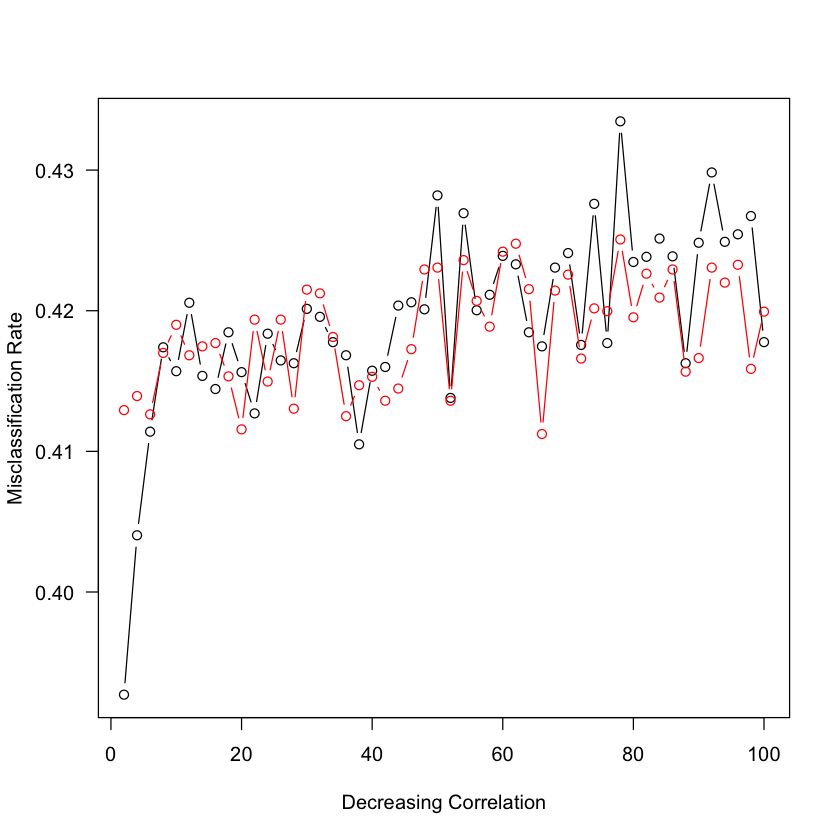

In [3]:
# Simulation Study 1
tictoc::tic()
###############################################################################
N <- 1200 # Number of observations
error_mn <- 0 # Mean of the error terms 
error_sd <- 5 # Standard deviation of the error terms
p <- 3 # Number of features 
mu <- c(rep(0, times = p)) # Vector of means of the features
beta <- c(rep(1, times = p)) # Coefficient vector 
reps <- 100
reps.vec <- seq(from = 2, to = reps, by = 2) # Sequence for the simulations
correct.tr <- matrix(data = NA, nrow = length(reps.vec), ncol = noseed) 
# CT results container
correct.rf <- matrix(data = NA, nrow = length(reps.vec), ncol = noseed) 
# RF results container
noseed <- 100 # Number of seeds
for (s in 1:noseed) {# Loop over seeds
  set.seed(s)
  for (t in reps.vec) { # Simulation 
    Sigma <- matrix(data = c(1,           1/(t^2),         1/sqrt(t),
                             1/(t^2),     1,               1/sqrt(t^(1/2)), 
                             1/sqrt(t),   1/sqrt(t^(1/2)), 1), # Correlation
                    # matrix as the diagonal is normalised to unity; the rest of 
                    # the terms go to zero with varying speeds
                    ncol = 3, nrow = 3, byrow = TRUE) # Sequence of matrices with 
    # decreasing correlation of features; if p > 3, Sigma needs to be adjusted  
    dt <- data.gen.sim1(obs = N, x.mean = mu, x.cov = Sigma, 
                        error.mean = error_mn, error.sd = error_sd,
                        coeff = beta) # Obtain data from data generator 
    
    train.i <- sample(1:nrow(dt), (dim(dt)[1]/2), replace = FALSE) # Split data
    train.data <- dt[train.i,] # Training data
    test.data <- dt[-train.i,] # Test data
    
    res.tr <- tree.fun(form = (y.cat ~ .), dt.train = train.data, # CT estimation
                       dt.test = test.data, test.Y = test.data$y.cat)
    
    res.m <- rep(NA, times = length(mu)) # Container for RF performance 
    for (q in 1:length(mu)) {
      set.seed(seed) 
      rf.m <- rf.fun(form = (y.cat ~ .), dt.train = train.data, dt.test = test.data, 
                     test.Y = test.data$y.cat, imp = FALSE, m = q)
      res.m[q] <- rf.m$share.correct
    } # Find optimal RF
    res.rf <- rf.fun(form = (y.cat ~ .), dt.train = train.data, dt.test = test.data, 
                     test.Y = test.data$y.cat, imp = FALSE, 
                     m = match(max(res.m), res.m)) # Optimal RF estimation
    
    k <- match(t, reps.vec) # In order to be able to store the results correctly 
    correct.tr[k, s] <- 1 - res.tr$share.correct # Misclassification rate CT
    correct.rf[k, s] <- 1 - res.rf$share.correct # Misclassification rate RF
  }
}
correct.tr.means <- rowMeans(correct.tr)
correct.rf.means <- rowMeans(correct.rf)
y.limits <- c(min(correct.tr.means, correct.rf.means), 
              max(correct.tr.means, correct.rf.means))
plot(reps.vec, correct.tr.means, type = "b", main = "", xlab = "Decreasing 
     Correlation", ylab = "Misclassification Rate", ylim = y.limits, las = 1) 
# Plot the misclassification rate of trees depending on the features' correlation
lines(reps.vec, correct.rf.means, type = "b", col = "red") # Add random forests
###############################################################################
tictoc::toc()

Evidently, the results show that the misclassification rates of trees and forests are not dramatically affected by multicollinearity, as changes to $\Sigma$ do not lead to significant changes in the classification errors. Indeed, it even turns out that for this setup, the out-of-sample prediction accuracy of the two methods slightly increases  the more correlation there is between the $X$'s. Remarkable is the relatively strong decrese in misclassification from the single trees for very strong correlations. These findings may be unexpected from a standard econometrics perspective but seem sensible when distinguishing between inference and prediction. Inference becomes increasingly hard in high-correlation settings since discerning the influence of each single factor becomes more difficult. On the other hand, trees and forests aim at predicting, where increased correlation does not hurt, but might even help at picking the right class for the outcome.

### 3.2 The Issue of (Highly) Categorical Targets <a class="anchor" id="third-two-bullet"></a>
Turning to the second simulation, we now aim at understanding the impact of increasing the number of categories in the target. That is, how does the number of classes $J$ in $y$ affect our prediction accuracy? From a theoretical standpoint, an increase in the number of categories should, ceteris paribus, lead to an increase of the error rates in trees and forests. This is a natural expectation as, with increasing $J$, the algorithms have more classes to which they can assign observations. This increased uncertainty makes it harder to identify the patterns governing the data generating process and should thus worsen predicitve performance. 

As in the above, this simulation first fixes some relevant parameters, then begins looping over 100 seeds and, for each seed, generates data in the same manner as in section 3.1. For each data set, another loop increases, step by step, the number of classes $J$ in $y$. Class creation is performed in a very deterministic way: ever more equidistant splits of the range of $y$ are performed and values inbetween two splits are assigned to a specific class $j$. Subsequently, the methods are fit on a training data set and evaluated on a test data set. As the data are randomly generated, it is not ensured that in each seed, each class $j$ in $y$ is non-empty. Thus, in those instances where there appear empty classes, we create non-seeded data in order to ensure that the process continuous without error. This, of course, reduces reproducability somewhat. Still, the results should be more robust than with no loop over seeds. Note: this simulation takes roughly seven minutes to complete on an average laptop.

410.089 sec elapsed


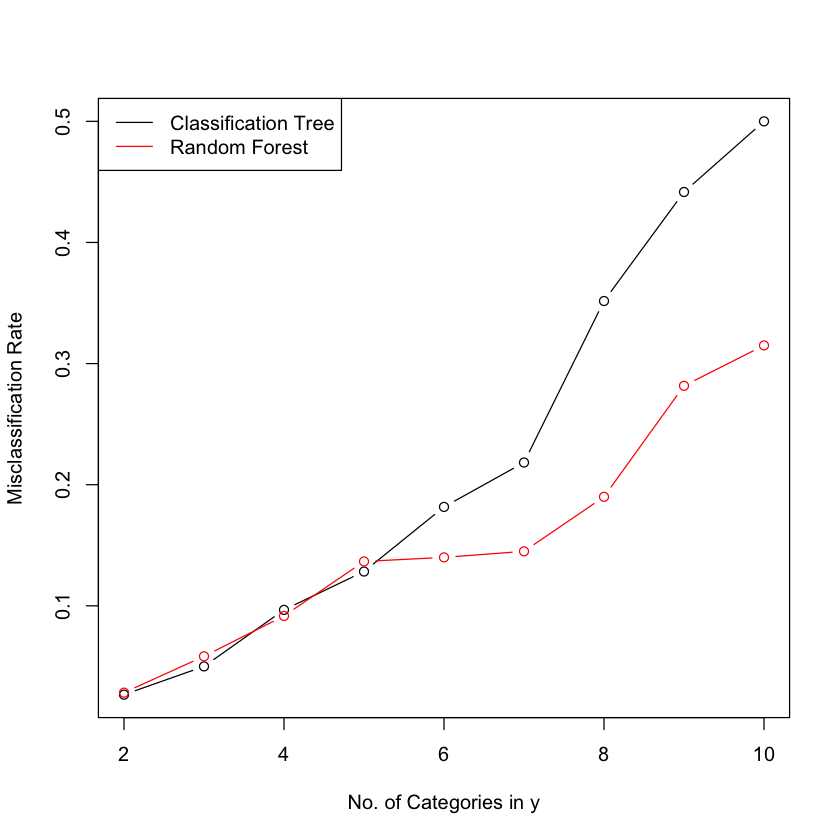

In [4]:
# Simulation Study 2
tictoc::tic()
###############################################################################
N <- 1200 # Number of observations
# error_mn <- 0 # Mean for normally distributed errors
# error_sd <- 10 # Standard deviation for normally distributed errors
error_minimum <- -20 # Minimum for uniformly distributed errors 
error_maximum <- 20 # Maximum for uniformly distributed errors 
p <- 3 # Number of features
mu <- c(rep(0, times = p)) # Vector of means of the features
Sigma <- matrix(data = c(1,   0.3, -0.1,
                         0.3, 1,   0.9,
                         -0.1, 0.9, 1), nrow = p, ncol = p, byrow = TRUE) 
# Positive definite covariance matrix; if p > 3,Sigma needs to be adjusted 
beta <- c(rep(0.5, times = p)) # Coefficient vector 
J <- 10 # Maximum number of categories in the outcome
noseed <- 100 # Number of seeds
correct.tr <- matrix(data = NA, nrow = J-1, ncol = noseed) # CT results container
correct.rf <- matrix(data = NA, nrow = J-1, ncol = noseed) # RF results container
x <- rep(1, times = noseed) # Mark instances where the seed is indeed successful 
# in creating data set with categories that have at least one observation
for (s in 1:noseed) { # Loop over seeds
  set.seed(s)
  data <- data.gen.sim2(obs = N, x.mean = mu, x.cov = Sigma, 
                        error.norm = FALSE,
                        error.unif = TRUE,
                        # error.mean = error_mn, error.sd = error_sd,
                        error.min = error_minimum, error.max = error_maximum, 
                        coeff = beta) # Data with uniform errors
  for (t in 2:J) { # Loop over number of categories in the outcome
    dt <- make.cat(dt = data, nocat = t) # Create t categories in the outcome 
    
    train.i <- sample(1:nrow(dt), (dim(dt)[1]/2), replace = FALSE) # Split data
    train.data <- dt[train.i,] # Training data
    test.data <- dt[-train.i,] # Test data
    
    cnt1 <- train.data %>% count(y.cat, .drop = FALSE) # Count observations per 
    # class in training data 
    cnt2 <- test.data %>% count(y.cat, .drop = FALSE) # Count observations per 
    # class in test data 
    cnt <- rbind(cnt1, cnt2) 
    while(0 %in% cnt[,2] == TRUE){ # Draw new data sets as long as the previous
      # data set produced empty categories of the outcome 
      x[s] <- 0 # Mark instances where setting the seed is unsuccessful 
      data <- data.gen.sim2(obs = N, x.mean = mu, x.cov = Sigma, 
                            error.norm = FALSE,
                            error.unif = TRUE,
                            # error.mean = error_mn, error.sd = error_sd,
                            error.min = error_minimum, error.max = error_maximum, 
                            coeff = beta)
      dt <- make.cat(dt = data, nocat = t)
      
      train.i <- sample(1:nrow(dt), (dim(dt)[1]/2), replace = FALSE)
      train.data <- dt[train.i,]
      test.data <- dt[-train.i,]
      
      cnt1 <- train.data %>% count(y.cat, .drop = FALSE)
      cnt2 <- test.data %>% count(y.cat, .drop = FALSE)
      cnt <- rbind(cnt1, cnt2)
    }
    res.tr <- tree.fun(form = (y.cat ~ .), dt.train = train.data, 
                       dt.test = test.data, test.Y = test.data$y.cat) 
    # Tree estimation
    
    res.m <- rep(NA, times = length(mu))
    for (q in 1:length(mu)) {
      rf.m <- rf.fun(form = (y.cat ~ .), dt.train = train.data, 
                     dt.test = test.data, test.Y = test.data$y.cat, m = q)
      res.m[q] <- rf.m$share.correct
    } # Find optimal RF (default ntree = 200)
    res.rf <- rf.fun(form = (y.cat ~ .), dt.train = train.data, 
                     dt.test = test.data, test.Y = test.data$y.cat, 
                     m = match(max(res.m), res.m)) # RF estimation
    
    correct.tr[t-1, s] <- 1 - res.tr$share.correct # Misclassification rate tree
    correct.rf[t-1, s] <- 1 - res.rf$share.correct # Misclassification rate RF 
  }
}
y.limits <- c(min((correct.tr %*% x), (correct.rf %*% x)), 
              max((correct.tr %*% x), (correct.rf %*% x)))
plot(2:J, (correct.tr %*% x), type = "b", main = "", 
     xlab = "No. of Categories in y", ylab = "Misclassification Rate", 
     ylim = y.limits) # Plot the misclassification rate of trees depending on 
# the degree of correlation among the features
lines(2:J, (correct.rf %*% x), type = "b", col = "red") # Add RF
legend("topleft", legend = c("Classification Tree", "Random Forest"), 
       col = c("black", "red"), lwd = 1, lty = 1) # Legend for the plot
###############################################################################
tictoc::toc()

Evidently, this simulation corroborates the ex ante reasoning. As the plot illustrates, augmenting the number of classes in the target lets the algorithms perform worse, ceteris paribus. Thus, we can conclude that, all else equal, the presented tree-based methods lose on predicitive ability when the outcome is categorical of (very) high order. As could be also expected, he increase in the misclassification rate is more pronounced for the single trees than for the random forests. 

A fair criticism to the above simulation is that, as the number of categories in $y$ increases, the number of observations per category obviously decreases. One could argue that this is the factor driving the higher misclassification rates for larger $J$'s. From a statistical standpoint, this is defintely a relevant argument which should be investigated in a more involved simulation approach. However, from an applied perspective, this argument is weakened as seldomly the number of observations in a data set, e.g. a survey, will be enlarged only because it contains a question with many possible categories.

### 3.3 The Problem of Omitted Features <a class="anchor" id="third-three-bullet"></a> 
Finally, the thrid simulation revolves around another well-known issue in econometrics, namely the omitted variable problem, which refers to the fact that OLS fails to provide unbiased estimates if relevant covariates are left out of the estimation (see e.g. **REFERENCE MISSING**). Is this a problem for the present tree-based methods, too? And if so, how relevant is its extent? Ex ante, one should expect a noticable effect. This is because any statistical approach can be only as good as the data it can learn from. Thus, as it the case with OLS, we expect the error rates to increase when the tree and forest algorithms are not provided with a relevant $X$ variable. 

Here, the code also first fixes parameters and then initialises a loop ober 100 seeds. However, in contrast to the above, the present setting aims at creating a data set resembling the real-world data from section 4. To that end, two un-ordered discrete variables, $X_1$ and $X_2$, are generated (resembling the variables **SEX** and **RACE** from below), one integer variable (akin to **AGE**), $X_3$, and a numerical variable (akin to **REALINC**), $X_4$, are generated. The latter feature is thereby generated conditionally on the first un-ordere discrete feature, in order to emulate a kind of correlation. Through making the features numeric, a numeric target is calulated by: 

$$ y = X_1(X_2 + X_3 - X_4^2) + \sum_{k = 1}^{4} \beta_k X_k + \varepsilon.$$

As in simulation 1, $y$ is made categorical through assigning 0/1 to $y$-values below/above the mean. Subsequently, estimations take place seperately, once for the case where $X_4$ is left out and once for the case where it is included alongside all other features. Note: this simulation takes roughly one minute to complete.

89.123 sec elapsed


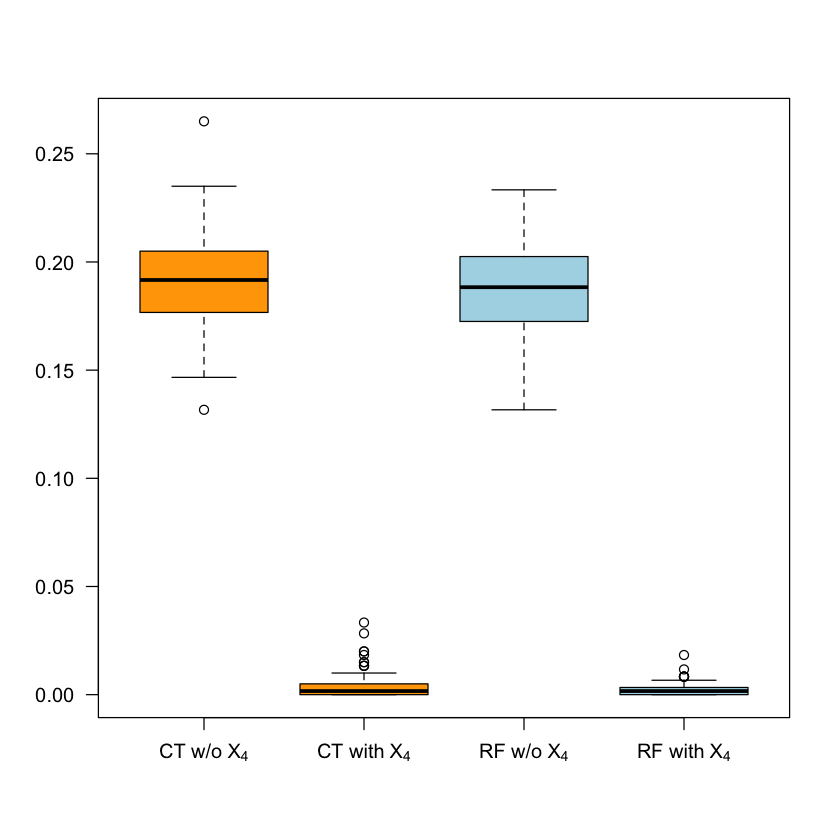

In [5]:
# Simulation Study 3
tictoc::tic()
###############################################################################
N <- 1200 # Number of observations
error_mn <- 0 # Mean for normally distributed errors
error_sd <- 10 # Standard deviation for normally distributed errors
# error_minimum <- -20 # Minimum for uniformly distributed errors 
# error_maximum <- 20 # Maximum for uniformly distributed errors 
beta <- c(rep(0.5, times = 4))
noseed <- 100 # Number of seeds
correct.tr <- matrix(data = NA, nrow = 2, ncol = noseed) # CT results container
correct.rf <- matrix(data = NA, nrow = 2, ncol = noseed) # RF results container
for (s in 1:noseed) { # Loop over seeds
  set.seed(s)
  
  dt <- data.gen.sim3(obs = N, 
                      error.norm = TRUE, error.unif = FALSE, 
                      error.mean = error_mn, error.sd = error_sd,
                      # error.min = error_minimum, error.max = error_maximum, 
                      coeff = beta)
  
  train.i <- sample(1:nrow(dt), (dim(dt)[1]/2), replace = FALSE)
  train.data <- dt[train.i,]
  test.data <- dt[-train.i,]
  
  # Without X[,4]
  res.tr <- tree.fun(form = (y.cat ~ . - num), dt.train = train.data, dt.test = test.data, 
                     test.Y = test.data$y.cat) # Tree estimation
  
  res.m <- rep(NA, times = (length(beta) - 1)) # Container for random forest performance 
  for (q in 1:(length(beta) - 1)) {
    set.seed(seed) 
    rf.m <- rf.fun(form = (y.cat ~ . - num), dt.train = train.data, dt.test = test.data, 
                   test.Y = test.data$y.cat, m = q) # Default is ntree = 200
    res.m[q] <- rf.m$share.correct
  } # Find optimal random forest 
  res.rf <- rf.fun(form = (y.cat ~ . - num), dt.train = train.data, dt.test = test.data, 
                   test.Y = test.data$y.cat, m = match(max(res.m), res.m)) # Optimal
  # random forest estimation

  correct.tr[1, s] <- 1 - res.tr$share.correct # Misclassification rate tree
  correct.rf[1, s] <- 1 - res.rf$share.correct # Misclassification rate RF 
  
  # With X[,4]
  res.tr <- tree.fun(form = (y.cat ~ .), dt.train = train.data, dt.test = test.data, 
                     test.Y = test.data$y.cat) # Tree estimation
  
  res.m <- rep(NA, times = length(beta)) # Container for random forest performance 
  for (q in 1:length(beta)) {
    set.seed(seed) 
    rf.m <- rf.fun(form = (y.cat ~ .), dt.train = train.data, dt.test = test.data, 
                   test.Y = test.data$y.cat, m = q) # Default is ntree = 200
    res.m[q] <- rf.m$share.correct
  } # Find optimal random forest 
  res.rf <- rf.fun(form = (y.cat ~ .), dt.train = train.data, dt.test = test.data, 
                   test.Y = test.data$y.cat, m = match(max(res.m), res.m)) # Optimal
  # random forest estimation
  
  correct.tr[2, s] <- 1 - res.tr$share.correct # Misclassification rate tree
  correct.rf[2, s] <- 1 - res.rf$share.correct # Misclassification rate RF 
}
correct <- rbind(correct.tr, correct.rf)
colours = c(rep("orange", 2), rep("lightblue", 2))
boxplot(t(correct), main = "", las = 1, col = colours,
        names = c(expression("CT w/o"~X[4]), expression("CT with"~X[4]), 
                  expression("RF w/o"~X[4]), expression("RF with"~X[4])))
###############################################################################
tictoc::toc()

Clearly, omitting the relevant feature $X_4$ from the estimations increases the misclassification error dramatically. Both, classification tree and random forests, perform far better when $X_4$ is included in the estimation process. Classification is almost perfect in that case, while the share of misclassified observations ranges from roughly 0.13 to 0.26 in the case where estimation is performed without including $X_4$. This makes very clear that omitting features that are relevant for the underlying, but unknown nature of the data causes serious statistical handicaps in terms of classification accuracy. Thus, as anticipated, machine learning methods such as the ones examined here do not escape the curse of the omitted variable problem.

In order to gain an insight into how the methods tested in the preceding passages can be applied to an economic setting, we now turn to a small-scale replication of the paper by *KT*.

## 4 Economic Application: Redistribution Preferences <a class="anchor" id="fourth-bullet"></a>

This section is inspired by the paper by *KT*, who conduct an investigation of individual-level preferences for govenment income redistribution in the US. *KT* use classification trees and random forests to classify these preferences with the help of several identity markers, i.e. variables characterising the identity and social environment of an individual respondent. To conduct their analysis, *KT* use panel-data from the General Social Survey (GSS). 

The present analysis also uses GSS data but the more recent 2018 round of the survey. More information on the data can be found in [appendix A](#eighth-first-bullet). Loading and cleaning the data, including all "identity markers" that *KT* use, leads to a sample with $N = 1,261$ observations and $p = 10$ features. Importantly, the classification exercise here concerns the outcome $y =$ **EQWLTH**, which asks the respondent to classify his/her inclination towards income redistribution to a number between 1, standing for view that the government should reduce income inequalities through redistribution, and 7, which means that the government should not concern itself with reducing such inequalities. Thus, $J = 7$.

In [3]:
# Loading and Cleaning the GSS Data
setwd("/Users/andreaskoundouros/Documents/Uni Master SS22/Computational Statistics/Project Redistribution Preferences/Data")
gss.data.full <- read.dta("GSS2018.dta")
gss.data <- select(gss.data.full, c("sex", "race", "reg16", "born", "parborn", 
                                    "madeg", "relig16", "fund16", "age",
                                    "realinc", "eqwlth"))
gss.data <- na.omit(gss.data) # Omit NAs
gss.data <- droplevels(gss.data) # Drop unused levels
rownames(gss.data) <- 1:nrow(gss.data) # Re-brand observation numbering
gss.data$eqwlth <- factor(gss.data$eqwlth) # Convert EQWLTH into factor

### 4.1 Empirical Results <a class="anchor" id="fourth-one-bullet"></a>
Next, classification trees and random forests are applied to the above data. Before doing so, note that *KT* proceed a bit differently in some respects. For example, *KT* use the twoing index to measure node impurity due to $J$ being large. However, for simplicity and because *KT* state that their results with Gini index were not very different, the latter is used here. Importantly, note that *KT* do not report prediction accuracy in their paper. This makes it unfortunately impossible to compare the present analysis to the one in *KT* in terms of statistical performance.

As in *KT*, I first fit a classification tree and random forests using all identity markers except for **REALINC**, the respondent's family income. As output, the share of correctly classified test observations (as opposed to the errors reported e.g. in the above) of the two methods are reported and the single tree as well as the variable importance measures produced by the random forests are plotted.  

[1] 0.2123613


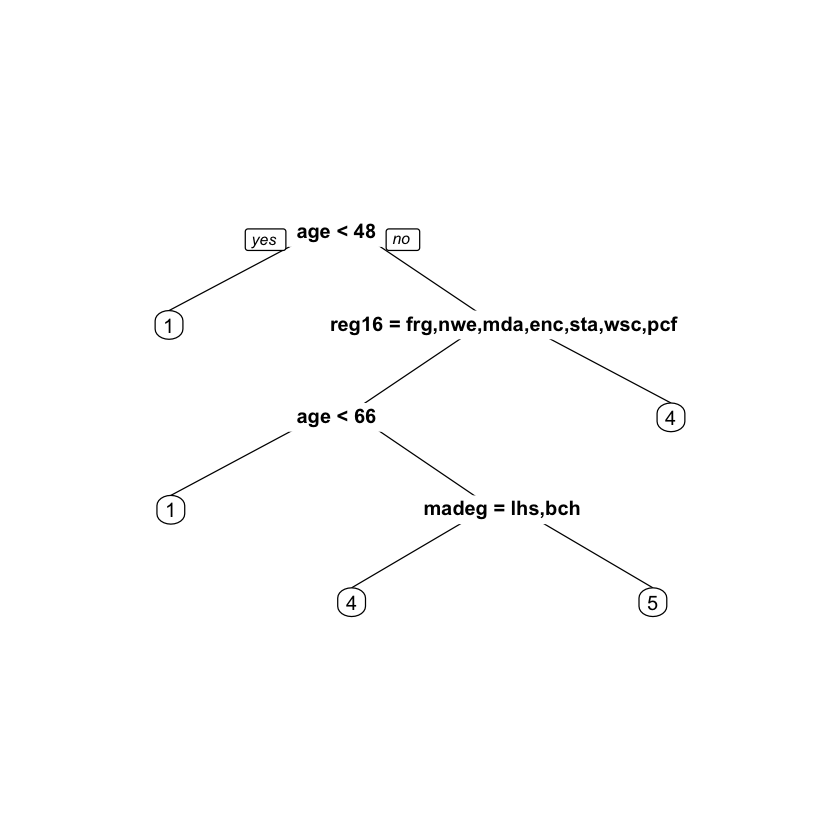

[1] 0.229794


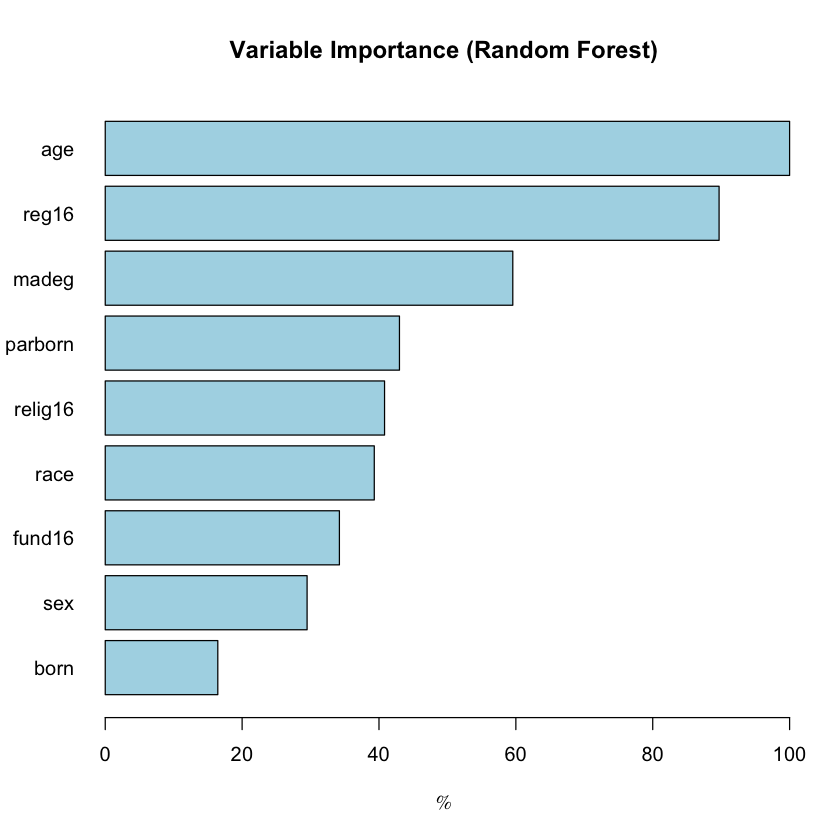

In [4]:
# Splitting the Data into Training and Test Data
set.seed(seed)
train.i <- sample(1:nrow(gss.data), (dim(gss.data)[1]/2), replace = FALSE)
gss.train.data <- gss.data[train.i,] # Training data 
gss.test.data <- gss.data[-train.i,] # Test data

# Classification Tree Estimation (without REALINC)
tr.gss <- tree.fun(form = (eqwlth ~ . - realinc), dt.train = gss.train.data, 
                   dt.test = gss.test.data, test.Y = gss.test.data$eqwlth, plot = TRUE)
print(tr.gss$share.correct)

# Random Forests Estimation (without REALINC)
set.seed(seed)
rf.gss <- rf.fun(form = (eqwlth ~ . - realinc), dt.train = gss.train.data, 
                 dt.test = gss.test.data, test.Y = gss.test.data$eqwlth, 
                 m = 1, own.vi.plot = TRUE) # m = 1 was determined as the 
# optimal m by a seperate for loop
print(rf.gss$share.correct)

Perhaps surprisingly, the classification tree computed above is starkly different to the corresponding one in *KT*. In the present case, **RACE** is not a splitting feature of the pruned tree. In *KT*, **RACE** is the first feature at which a split is performed. Here, however, the first split partitions the sample into respondents younger than 48 and those older. The young are classified as being strongly in favour of redistribution (1). The older half of the population is further split by the region they used to live in at the age of 16 (**REG16**). In the regions labeled "mountain", "west north central" and "east south central", the support for income redistribution is classified as a 4, i.e. lower middle. The population in the rest of the country is further partitioned. The respondents younger than 66 are again classified as 1, whereas the ones above that threshold are classified as 4 or 5, depending on their mother's education (**MADEG**). In total, the single tree correctly classifies 21.2% of the out-of-sample respondents. This can be believed to be a quite bad performance. However, it still is considerably higher than than $\frac{1}{7}$, the best-case performance of random guessing.

Some of the single-tree results are reflected in the variable importance plot produced by the random forest procedure. **AGE** and **REG16** seem to be the most important predictors for **EQWLTH**, followed by **MADEG**. Unlike in *KT*, **RACE** and **SEX** do not seem to be important classifying features of the data here as they appear only on 6th and 8th place. Further, note that the random forest does perform only slightly better than the single tree, as the share of correctly classified observations is close to 23%.

Next, the above specification is augmented by **REALINC**.

[1] 0.2329635


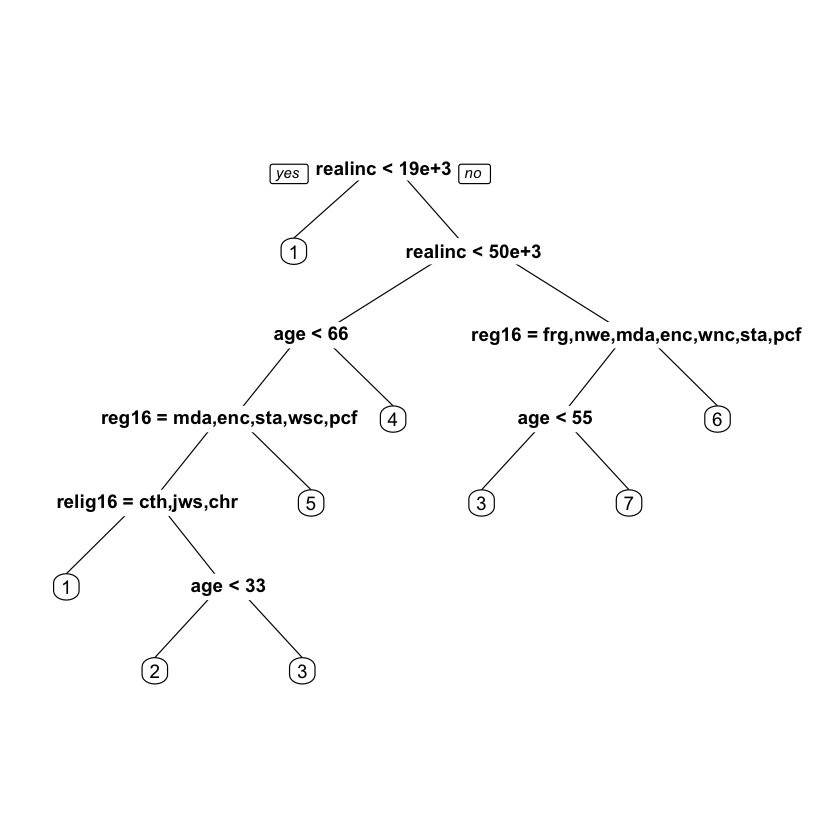

[1] 0.2345483


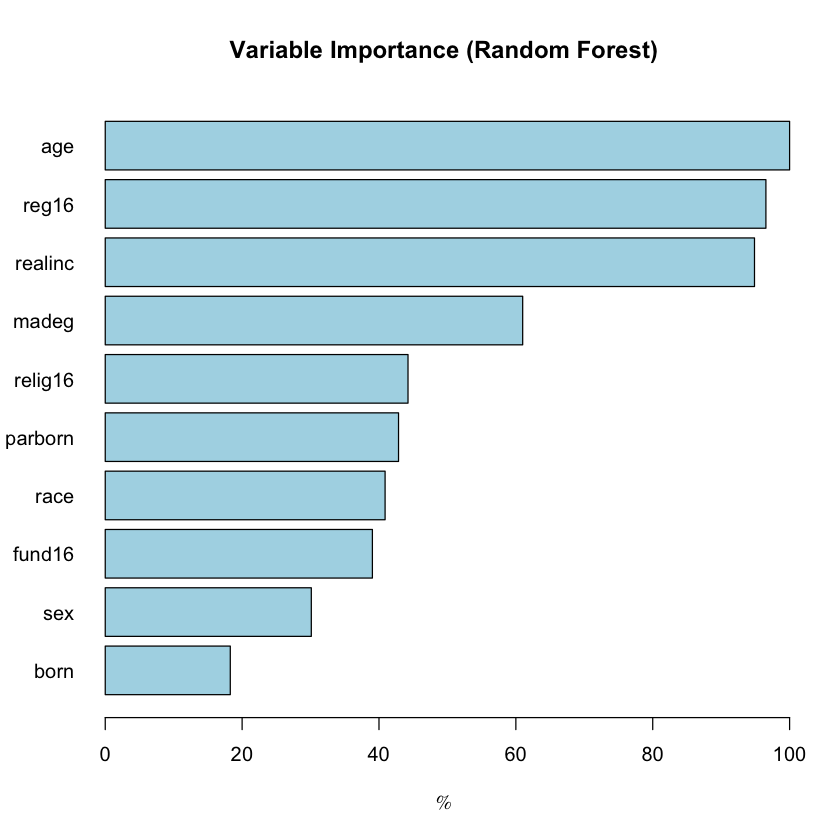

In [5]:
# Classification Tree with REALINC as feature
tr.gss.rinc <- tree.fun(form = (eqwlth ~ .), dt.train = gss.train.data, 
                        dt.test = gss.test.data, test.Y = gss.test.data$eqwlth, plot = TRUE)
print(tr.gss.rinc$share.correct)

# Random Forest with REALINC as feature
set.seed(seed)
rf.gss.rinc <- rf.fun(form = (eqwlth ~ .), dt.train = gss.train.data, 
                      dt.test = gss.test.data, test.Y = gss.test.data$eqwlth, 
                      m = 1, own.vi.plot = TRUE)
print(rf.gss.rinc$share.correct)

Startlingly, the new single-tree results are not only very different to those in *KT* but also to the tree without **REALINC**. Now, the first two splits are performed using **REALINC**. Low income respondents are assigned to be very strongly in favour of income redistribution (1), while middle incomes are further partitioned using **AGE**, **REG16** and **RELIG16**, the religion with which the respondent was raised, and are - depending on the exact partition -  classified to be between 1 and 5. The high income group is further split by **REG16** and **AGE** and classification tends more towards being against redistribution, between 3 and 7. Again, in stark contrast to *KT*'s findings, the respondent's ethnicity does not seem to be important in the present data. However, as a similarity to *KT*, **REALINC** seems to be a relevant variable today as it was then, as *KT*'s classification tree includes multiple splits on income, too. Furthermore, classification performance increased somewhat to 23.3%.

Once more, the random forest variable importance measure corroborates that a respondent's age, family income and  region of upbringing are very important in classifying his redistribution preferences. However, **SEX** and **RAcE** seem again to be very unimportant for classifying the respondents. Note also that the random forest once more beats the single tree by a slight margin in terms of predictive performance (23.5%).

### 4.2 Discussion <a class="anchor" id="fourth-two-bullet"></a>
The above results prompt some interesting, yet challenging questions. Here, I briefly want to touch on three of these. 

First, a natural question is that of alternative classifiers. Statistics and machine learning offer a wide variety of methods. For example, one interesting extension of the above would be to apply other methods for the preference classification, e.g. multinomial logit or boosted trees. Also, there exist more refined versions of the methods applied here and it would be interesting to see how they could improve on the 23% correclty classified observations. 

Second, as the very last estimations show, the respondent's family income should be included in the classification process. This is not only an economically meaningful step, but also improves on the predictive performance of the present methods, thereby helping to avoid an omitted variable problem akin to the one simulated in section 3.3. Naturally, the question arises if further features have been omitted here and should be included in the future. For example, **REFERENCE MISSING** include features of the aggregate economy, inequality measures in particular, to study redistribution preferences in Europe. 

Finally, as with all empirical work, the present results should be interpreted with caution. In order to gain a thorough understanding of the formation of redistribution preferences, the analysis should be extended across space and time to include data from other countries and time periods.

## 5 Conclusion <a class="anchor" id="fifth-bullet"></a>

The classification problem is the statistical challenge of assigning an observation to a particular category, knowing only the realisations of its corresponding features. Classification trees classify an observation by recursively partitioning the feature space in a way that maximises the homogeneity of the partitions. Random forests try to improve on the single-tree classifier by aggregating predictions from unpruned trees, obtained from bootstrapping the original data set sufficiently often. 

The present project conducted three simulation studies, putting these methods to a real-world-inspired test. It turns out that trees and forests are not impacted by multicollinearity as much as one could expect with pure introductory econometrics knowledge. However, care has to be taken when the target is (highly) categorical. Most likely, only quite large data sets will be able to perform well at classifying outcomes with many classes. Finally, classification accuracy deteriorates dramatically when important features are not available for the estimation process. 

As an economic illustration of these tree-based methods, this project followed *KT* by using classification trees and random forests and by analysing US survey data to get a (rough) understanding of how some identity markers shape redistribution preferences. The results here were quite different to those in *KT*. However, as the simulations show, care has to be taken when interpreting the results of these classification exercises. Clearly, the present methods are not sufficient to fully comprehend how individuals form their preferences for income redistribution. 

---

### References <a class="anchor" id="sixth-bullet"></a>

* Breiman, L. (2001). Random forests. *Machine learning*, 45(1), 5–32.
* Breiman, L., Friedman, J.H., Olshen, R.A., & Stone, C.J. (1984). Classification and Regression Trees (1st ed.). New York: Routledge.
* Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference and Prediction* (2nd ed.). New York: Springer New York.
* Hill, R. C., Griffiths, W. E., & Lim, G. C. (2018). *Principles of Econometrics* (5th ed.). Hoboken, NJ: John Wiley & Sons.
* Ho, T. K. (1995). Random decision forests. In *Proceedings of 3rd International Conference on Document Analysis and Recognition* (Vol. 1, p. 278-282 vol.1).
* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). *An Introduction to Statistical Learning: With Applications in R* (2nd ed.). New York: Springer New York. Free online version: https://www.statlearning.com
* Keely, L. C., & Tan, C. M. (2008). Understanding Preferences for Income Redistribution. *Journal of Public Economics*, 92(5-6), p. 944-961.   
* Varian, H. R. (2014). Big Data: New Tricks for Econometrics. *Journal of Economic Perspectives*, 28(2), 3-28. 

---

### Appendix <a class="anchor" id="eighth-bullet"></a>

#### Appendix A: Description and Overview of the GSS Data Set <a class="anchor" id="eighth-first-bullet"></a>
This appendix first introduces the survey which provides the data used in the application section of this thesis. Thereafter, additional code calculating some summary statistics of the clean data set is presented.


The GSS is a representative, nation-wide, sociological survey of US American adult residents. It is conducted every second year by the National Opinion Research Center at the University of Chicago. In the present work, I exclusively use cross-section data for a single year in order to avoid time series-related issues. 2018 is chosen so as to avoid potential distortions in responses due to the Covid pandemic. The data can be obtained from: https://gss.norc.org/Get-The-Data and an extensive description of how the survey is performed can be found here: https://gss.norc.org/Get-Documentation. 

Note importantly that I select some fewer variables than KT do, in particular only the identity markers. This is because an exact replication of KT's approach would be beyond the scope of this thesis. Second, the only target variable and thus the main variable of interest here is **EQWLTH**. This also deviates slightly from KT's procedure but again simplifies the analysis. Third, the variable **REALINC**, recording the real income of the respondent's family, is used as a feature and as an outcome variable in KT. Here, it will be used exclusively as a feature, which is an intuitive choice. 

**EQWLTH** asks the survey respondent to classify his/her inclination towards income redistribution to a number between 1, standing for: the government should reduce income inequalities through redistribution, and 7, which means: the government should not concern itself with reducing such inequalities. Specifically, the question asked is: 

> Some people think that the government in Washington ought to reduce the income differences between the rich and the poor, perhaps by raising the taxes of wealthy families or by giving income assistance to the poor. Others think that the government should not concern itself with reducing this income difference between the rich and the poor. <br> Here is a card with a scale from 1 to 7. Think of a score of 1 as meaning that the government ought to reduce the income differences between rich and poor, and a score of 7 meaning that the government should not concern itself with reducing income differences. What score between 1 and 7 comes closest to the way you feel?

The variables **SEX**, **RACE**, **AGE** are self-explanatroy. **BORN** and **PARBORN** ask whether the respondent and his parents were born in the US, respectively. **REALINC** is the respondent's (real) family income, **REG16** the region in which the respondent lived at the age of 16 and **MADEG** the highest degree obtained by the mother. **RELIG16** is the religion in which the respondent was raised and **FUND16** measures how fundamentalist the religious upbringing was. 

With the following code, we obtain an overview of the final data set.

In [10]:
# Overview of the data
head(gss.data) # The first 6 observations of the clean data set 
summary(gss.data) # Get summary of the included variables 

,sex,race,reg16,born,parborn,madeg,relig16,fund16,age,realinc,eqwlth
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>
1,female,white,middle atlantic,yes,mother only,lt high school,catholic,moderate,74,14755.0,7
2,male,white,middle atlantic,yes,father only,bachelor,catholic,moderate,42,72640.0,3
3,female,white,middle atlantic,yes,both in u.s,high school,catholic,moderate,63,119879.4,5
4,male,black,middle atlantic,yes,father only,high school,catholic,moderate,71,119879.4,6
5,female,black,middle atlantic,yes,both in u.s,lt high school,protestant,fundamentalist,59,8512.5,5
6,male,white,middle atlantic,yes,both in u.s,high school,catholic,moderate,43,24970.0,1


     sex         race                 reg16      born     
 male  :583   white:930   e. nor. central:227   yes:1127  
 female:678   black:209   south atlantic :207   no : 134  
              other:122   pacific        :165             
                          middle atlantic:160             
                          w. sou. central:133             
                          foreign        :101             
                          (Other)        :268             
             parborn                madeg                   relig16   
 both in u.s     :1021   lt high school:311   protestant        :698  
 mother only     :  44   high school   :637   catholic          :392  
 father only     :  29   junior college: 85   jewish            : 25  
 mother; fa. dk  :   4   bachelor      :161   none              :130  
 not mother;fa.dk:   1   graduate      : 67   orthodox-christian:  9  
 dk for both     :   3                        christian         :  7  
 neither in u.s  : 159         

For an easy comparison of the summary statistics of the present data set with that of *KT*, consider the following code and output.

In [5]:
# Summary Statistics of the Data 
gss.data[sapply(gss.data, is.factor)] <- data.matrix(gss.data[sapply(gss.data, 
                                                                     is.factor)])
round(colMeans(gss.data), 2) # Means
round(apply(gss.data, 2, sd), 2) # Standard deviations

sex     race    reg16     born  parborn    madeg  relig16   fund16 
    1.54     1.36     5.55     1.11     1.86     2.24     1.72     1.94 
     age  realinc   eqwlth 
   48.53 34985.41     3.60

sex     race    reg16     born  parborn    madeg  relig16   fund16 
    0.50     0.65     2.71     0.31     2.01     1.12     1.03     0.74 
     age  realinc   eqwlth 
   17.47 31761.76     1.95

Note: if you want to re-run other sections of the code after running this very last one, run the code downloading the data first, as most estimations do not work if all variables are numeric.

---